## Intro Regresión Lineal

---

In [22]:
# Tratamiento de datos
import pandas as pd
import numpy as np

#  Modelado y evaluación
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#  Crossvalidation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Para evitar que salgan los warnings en jupyter
import warnings
warnings.filterwarnings('ignore')

# librerías para la visualización de los datos
import matplotlib.pyplot as plt
import seaborn as sns

El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning.
En el pair programming de hoy debéis usar el csv que guardastéis cuando hicistéis el pairprgramming de codificicación (este csv debería tener las variables estadandarizas).

In [3]:
df = pd.read_csv("../files/endesarrollo_map.csv", index_col = 0)
df.sample(5)


,continente_map,life_expectancy,adult_mortality,infant_deaths,alcohol,bmi,diphtheria,hiv_aids,gdp,income_composition_of_resources,schooling
1289,1,50.0,2.26250,1.148148,-0.269440,-0.514738,0.045455,12.000000,-0.279093,-0.851747,-0.552632
1478,3,66.2,-0.88125,1.370370,-0.382368,-0.365205,-0.681818,0.214286,-0.054830,-0.322946,-0.684211
1690,3,77.8,-0.56875,-0.185185,-0.297177,0.925953,0.090909,0.000000,24.568046,0.798867,0.447368
818,1,66.0,0.41250,-0.111111,0.091959,0.043134,-3.727273,1.857143,1.697629,0.258735,0.236842
349,1,51.0,1.09375,1.629630,0.376424,-0.629763,-0.954545,2.214286,-0.376597,-2.362606,-2.131579


In [4]:
df.shape

(2410, 11)

Para eso recordad que:
Deberéis separar la X y la y.

`Separamos los datos entre x= variables predictoras e Y= variable respuesta`

In [5]:
X = df.drop("life_expectancy", axis = 1)
y = df["life_expectancy"]

Deberéis crear el train y el test.


`Creamos los datos de train y test en este caso 80% para train y 20% para test.`

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

Ajustar vuestro modelo.

In [61]:
lr = LinearRegression(n_jobs=-1) #Iniciamos regresion lineal


In [62]:
lr.fit(x_train, y_train) #aplicamos el metodo fit

LinearRegression(n_jobs=-1)

In [63]:
#Aplicamos el metodo predict
y_predict_train = lr.predict(x_train) 
y_predict_test = lr.predict(x_test)

In [64]:
# Generamos los dataframes correspondientes
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df  = pd.DataFrame({'Real': y_test,  'Predicted': y_predict_test,  'Set': ['Test']*len(y_test)})


In [65]:
#Unimos los df de test y train y vemos su contenido.
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.sample(4)

,Real,Predicted,Set
2323,71.0,66.990061,Train
655,71.4,71.732978,Train
1183,66.7,69.301851,Test
1051,64.7,67.121584,Train


In [66]:
#Calculamos los resultados y los agregamos al df
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.sample(10)

,Real,Predicted,Set,residuos
2015,70.0,71.340207,Train,-1.340207
1512,68.9,65.816031,Train,3.083969
191,73.3,76.012296,Train,-2.712296
2200,74.0,69.858245,Train,4.141755
1095,73.4,73.906712,Train,-0.506712
2247,67.6,72.973291,Train,-5.373291
1473,49.8,49.719283,Train,0.080717
236,55.8,59.192698,Train,-3.392698
1123,62.9,63.597999,Test,-0.697999
1108,69.5,74.982736,Train,-5.482736


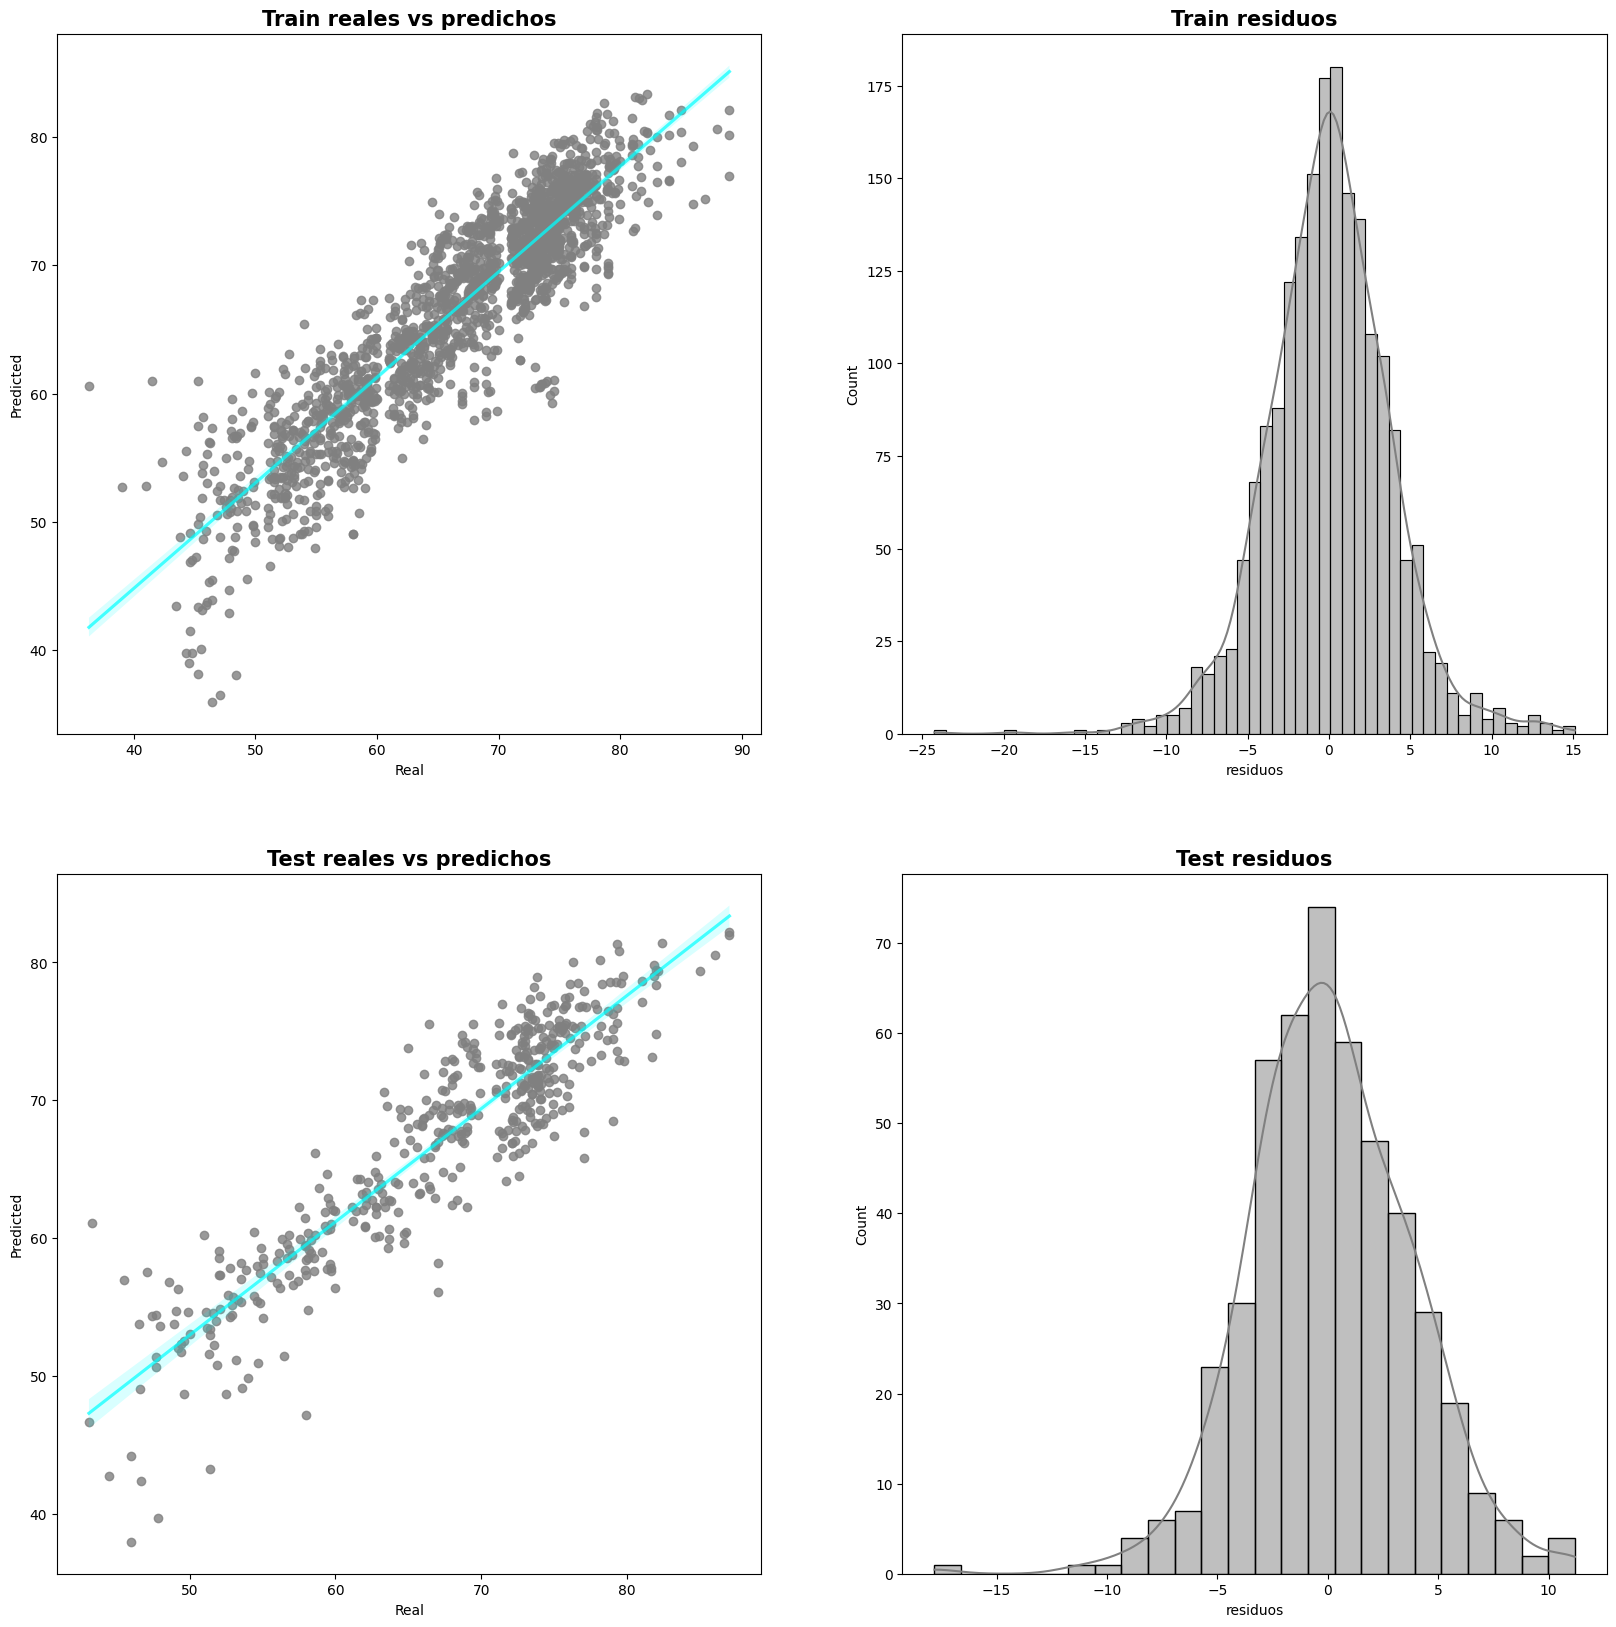

In [67]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
            x = "Real", 
            y = "Predicted", 
            ax = ax[0,0], 
            color = "grey",
            line_kws = {"color": "aqua", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
            x = "Real",
            y = "Predicted", 
            color = "gray",
            line_kws = {"color": "aqua", "alpha": 0.7 }, 
            ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
             x="residuos",
             color ="grey",
             kde=True,
             line_kws= {"color": "aqua"},
             ax = ax[0,1])

 

sns.histplot(resultados[resultados['Set'] == "Test"],
             x="residuos",
             color = "grey",
             kde=True, 
             ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold");

---

#### Cross_validate

`Vamos a aplicar el metodo cross_validate para ver si nuestra regresion lineal esta funcionando bien.`

In [68]:
cv_scores = cross_validate(
                estimator = LinearRegression(),
                X         = X,
                y         = y,
                scoring   = ('r2', 'neg_root_mean_squared_error','neg_mean_squared_error'),
                cv        = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error,test_neg_mean_squared_error
0,0.010190,0.001718,0.696031,-4.377225,-19.160096
1,0.004244,0.001481,0.856491,-4.237200,-17.953867
2,0.003764,0.001556,0.837262,-3.332104,-11.102915
3,0.002732,0.001261,0.853646,-3.665841,-13.438389
4,0.003637,0.001906,0.696410,-3.665743,-13.437671
5,0.004285,0.001791,0.828615,-3.897862,-15.193326
6,0.009796,0.001674,0.862959,-3.009479,-9.056965
7,0.004136,0.001359,0.666476,-4.945357,-24.456555
8,0.002812,0.001730,0.781355,-3.925797,-15.411885
9,0.003952,0.001880,0.838024,-3.698665,-13.680125


In [69]:
cv_scores['test_r2'].mean()

0.7917266997251022

In [70]:
cv_scores['test_neg_root_mean_squared_error'].mean()

-3.8755272983748945

---

### Vamos a intentar predecir algunos datos

In [72]:
mi_pred= np.array([2,0.21875,-0.185185, 0.195, 1.23,-0.54,0,0.017,-0.14,0.052]).reshape(1,-1)

In [73]:
res=lr.predict(mi_pred)

In [74]:
res

array([68.52201295])